# Data Fundamentals Week 7 Project

Edgar Suarez

[GitHub Repository](https://github.com/edgarsuarez9/datafun-07-ml)

In [258]:
## Import Dependencies 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

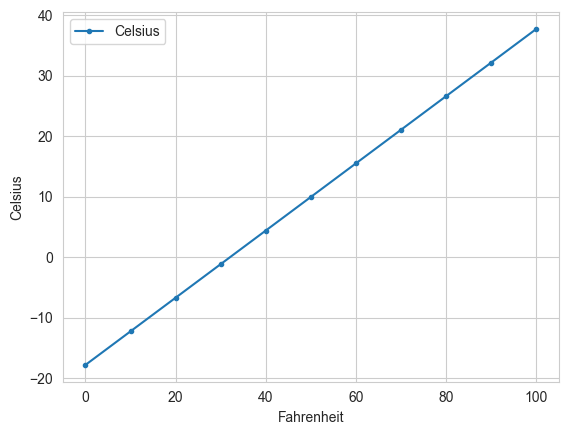

In [259]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## Part 2 - Prediction

### Section 1 - Data Acquisition

In [260]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [261]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [262]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Section 4 - Descriptive Statistics

In [263]:
nyc_df.Date.dtype
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [264]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [265]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

linear_regression.slope
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

In [266]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

In [267]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

(10.0, 70.0)

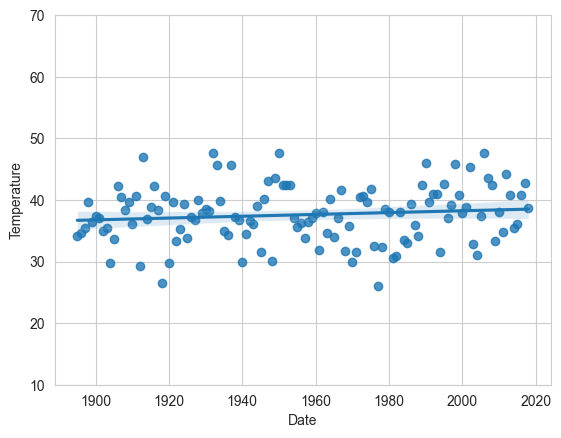

In [268]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction.

### Section 1 - Build a Model

In [269]:
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

X_train.shape
X_test.shape

(31, 1)

In [270]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_
linear_regression.intercept_


np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [271]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [272]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [273]:
predict(2024)

array([38.94094855])

In [274]:
predict (1890)

array([36.34246432])

### Section 4 - Visualizations

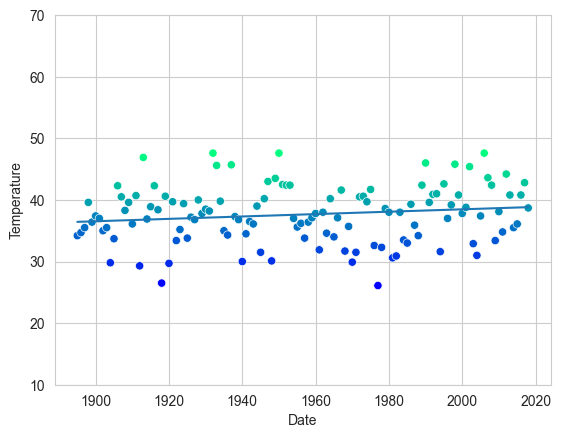

In [275]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4: Insights

The model illustrates temperature has been trending upwards since 1890 and into 2024.

The average temperature in Celsius has risen from 36.34 towards 38.59 in 2019 and predicted at 38.94 in 2024. The model supports the trend will continue. 

The model does not provide a reasoning for why the upward trend is present. However, Climate Change is likely cause fueled by the last century's eruption of industrialization. 